# Messing Around with Team Stats

#### Dependencies

In [267]:
from nba_api.stats.static import teams
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
import os
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from bs4 import BeautifulSoup
import requests

#### Getting Data

In [272]:
nba_teams = teams.get_teams()
# print(nba_teams[0])

In [273]:
def get_23_games_dict(nba_teams):
    games_23_dict = {}
    for index, team in enumerate(nba_teams):
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = nba_teams[index]['id'])
        all_games = gamefinder.get_data_frames()[0]

        games_23 = all_games[all_games.GAME_DATE.str[:4] == '2023']
        games_23_dict[team['full_name']] = games_23
    return games_23_dict

In [274]:
games_23 = get_23_games_dict(nba_teams)

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [275]:
hawks_df = games_23['Atlanta Hawks']
avg_3PA = hawks_df['FG3A'].dropna().mean()
avg_3PFGP = hawks_df['FG3_PCT'].dropna().mean()

print(f"Hawks: 3PA {avg_3PA}, 3FG% {avg_3PFGP}")

Hawks: 3PA 29.517241379310345, 3FG% 0.3788620689655172


In [ ]:
# for index, team in enumerate(games_23):
#     print(team)

In [ ]:
def specific_dict(games_23):
    avg_3pa_list = []
    avg_3pfgp_list = []

    for index, team in enumerate(games_23):
        team_df = games_23[team]
        avg_3PA = team_df['FG3A'].dropna().mean()
        avg_3PFGP = team_df['FG3_PCT'].dropna().mean()
        avg_3pa_list.append(avg_3PA)
        avg_3pfgp_list.append(avg_3PFGP)
        
    return avg_3pa_list, avg_3pfgp_list


In [288]:
games_23['Atlanta Hawks']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612737,ATL,Atlanta Hawks,0022200974,2023-03-06,ATL @ MIA,L,239,128,...,0.739,12,25,37,28,5.0,0,10,25,-2.0
1,22022,1610612737,ATL,Atlanta Hawks,0022200958,2023-03-04,ATL @ MIA,L,239,109,...,0.867,10,27,37,22,12.0,1,16,23,-8.0
2,22022,1610612737,ATL,Atlanta Hawks,0022200947,2023-03-03,ATL vs. POR,W,239,129,...,0.813,10,33,43,30,10.0,5,17,19,18.0
3,22022,1610612737,ATL,Atlanta Hawks,0022200923,2023-02-28,ATL vs. WAS,L,239,116,...,0.895,13,29,42,21,4.0,7,9,17,-3.0
4,22022,1610612737,ATL,Atlanta Hawks,0022200911,2023-02-26,ATL vs. BKN,W,240,129,...,0.821,13,33,46,20,7.0,2,15,18,2.0
5,22022,1610612737,ATL,Atlanta Hawks,0022200896,2023-02-24,ATL vs. CLE,W,240,136,...,0.913,5,37,42,28,7.0,8,14,21,17.0
6,22022,1610612737,ATL,Atlanta Hawks,0022200876,2023-02-15,ATL vs. NYK,L,243,101,...,0.762,8,32,40,25,6.0,7,4,18,-21.0
7,22022,1610612737,ATL,Atlanta Hawks,0022200857,2023-02-13,ATL @ CHA,L,240,138,...,1.000,16,26,42,26,9.0,4,12,15,-6.0
8,22022,1610612737,ATL,Atlanta Hawks,0022200850,2023-02-11,ATL vs. SAS,W,241,125,...,0.789,14,34,48,29,9.0,6,10,10,19.0
9,22022,1610612737,ATL,Atlanta Hawks,0022200832,2023-02-09,ATL vs. PHX,W,239,116,...,0.741,20,39,59,23,6.0,4,18,22,9.0


In [294]:
games_23['Atlanta Hawks']['TEAM_ABBREVIATION'][0]

'ATL'

In [298]:
data_list = []
for index, team in enumerate(games_23):
    temp_dict = {'id': nba_teams[index]['id'], 'abbreviation': nba_teams[index]['abbreviation']}
    temp_dict['FG3A'] = games_23[team]['FG3A'].dropna().mean()
    temp_dict['FG3_PCT'] = games_23[team]['FG3_PCT'].dropna().mean()
    temp_dict['logo_path'] = f"logos/{games_23[team]['TEAM_ABBREVIATION'][0]}.png"
    data_list.append(temp_dict)
    # print(nba_teams[index]['abbreviation'])
    # team_df = games_23[team]
    # avg_3PA = team_df['FG3A'].dropna().mean()
    # avg_3PFGP = team_df['FG3_PCT'].dropna().mean()

In [300]:
data_df = pd.DataFrame(data_list)
data_df

,id,abbreviation,FG3A,FG3_PCT,logo_path
0,1610612737,ATL,29.517241,0.378862,logos/ATL.png
1,1610612738,BOS,41.900000,0.377133,logos/BOS.png
2,1610612739,CLE,31.733333,0.357700,logos/CLE.png
3,1610612740,NOP,28.965517,0.338276,logos/NOP.png
4,1610612741,CHI,28.275862,0.346103,logos/CHI.png
5,1610612742,DAL,39.678571,0.380393,logos/DAL.png
6,1610612743,DEN,32.500000,0.383033,logos/DEN.png
7,1610612744,GSW,43.785714,0.393643,logos/GSW.png
8,1610612745,HOU,29.928571,0.322679,logos/HOU.png
9,1610612746,LAC,33.586207,0.377759,logos/LAC.png


#### Work to Get Logos

Just wound up manually downloading the PNGs since the only good site I found had a scrap blocker.

#### Combining into a Single DataFrame

In [303]:
data = data_df
data.head()

,id,abbreviation,FG3A,FG3_PCT,logo_path
0,1610612737,ATL,29.517241,0.378862,logos/ATL.png
1,1610612738,BOS,41.900000,0.377133,logos/BOS.png
2,1610612739,CLE,31.733333,0.357700,logos/CLE.png
3,1610612740,NOP,28.965517,0.338276,logos/NOP.png
4,1610612741,CHI,28.275862,0.346103,logos/CHI.png


#### Plotting the Data

In [327]:
# define a function for getting the image path and loading it into the visualization
def getImage(path):
    return OffsetImage(plt.imread(path, format='png'), zoom = .15)

In [338]:
FG3A_mean = data['FG3A'].median()
FG3_PCT_mean = data['FG3_PCT'].median()

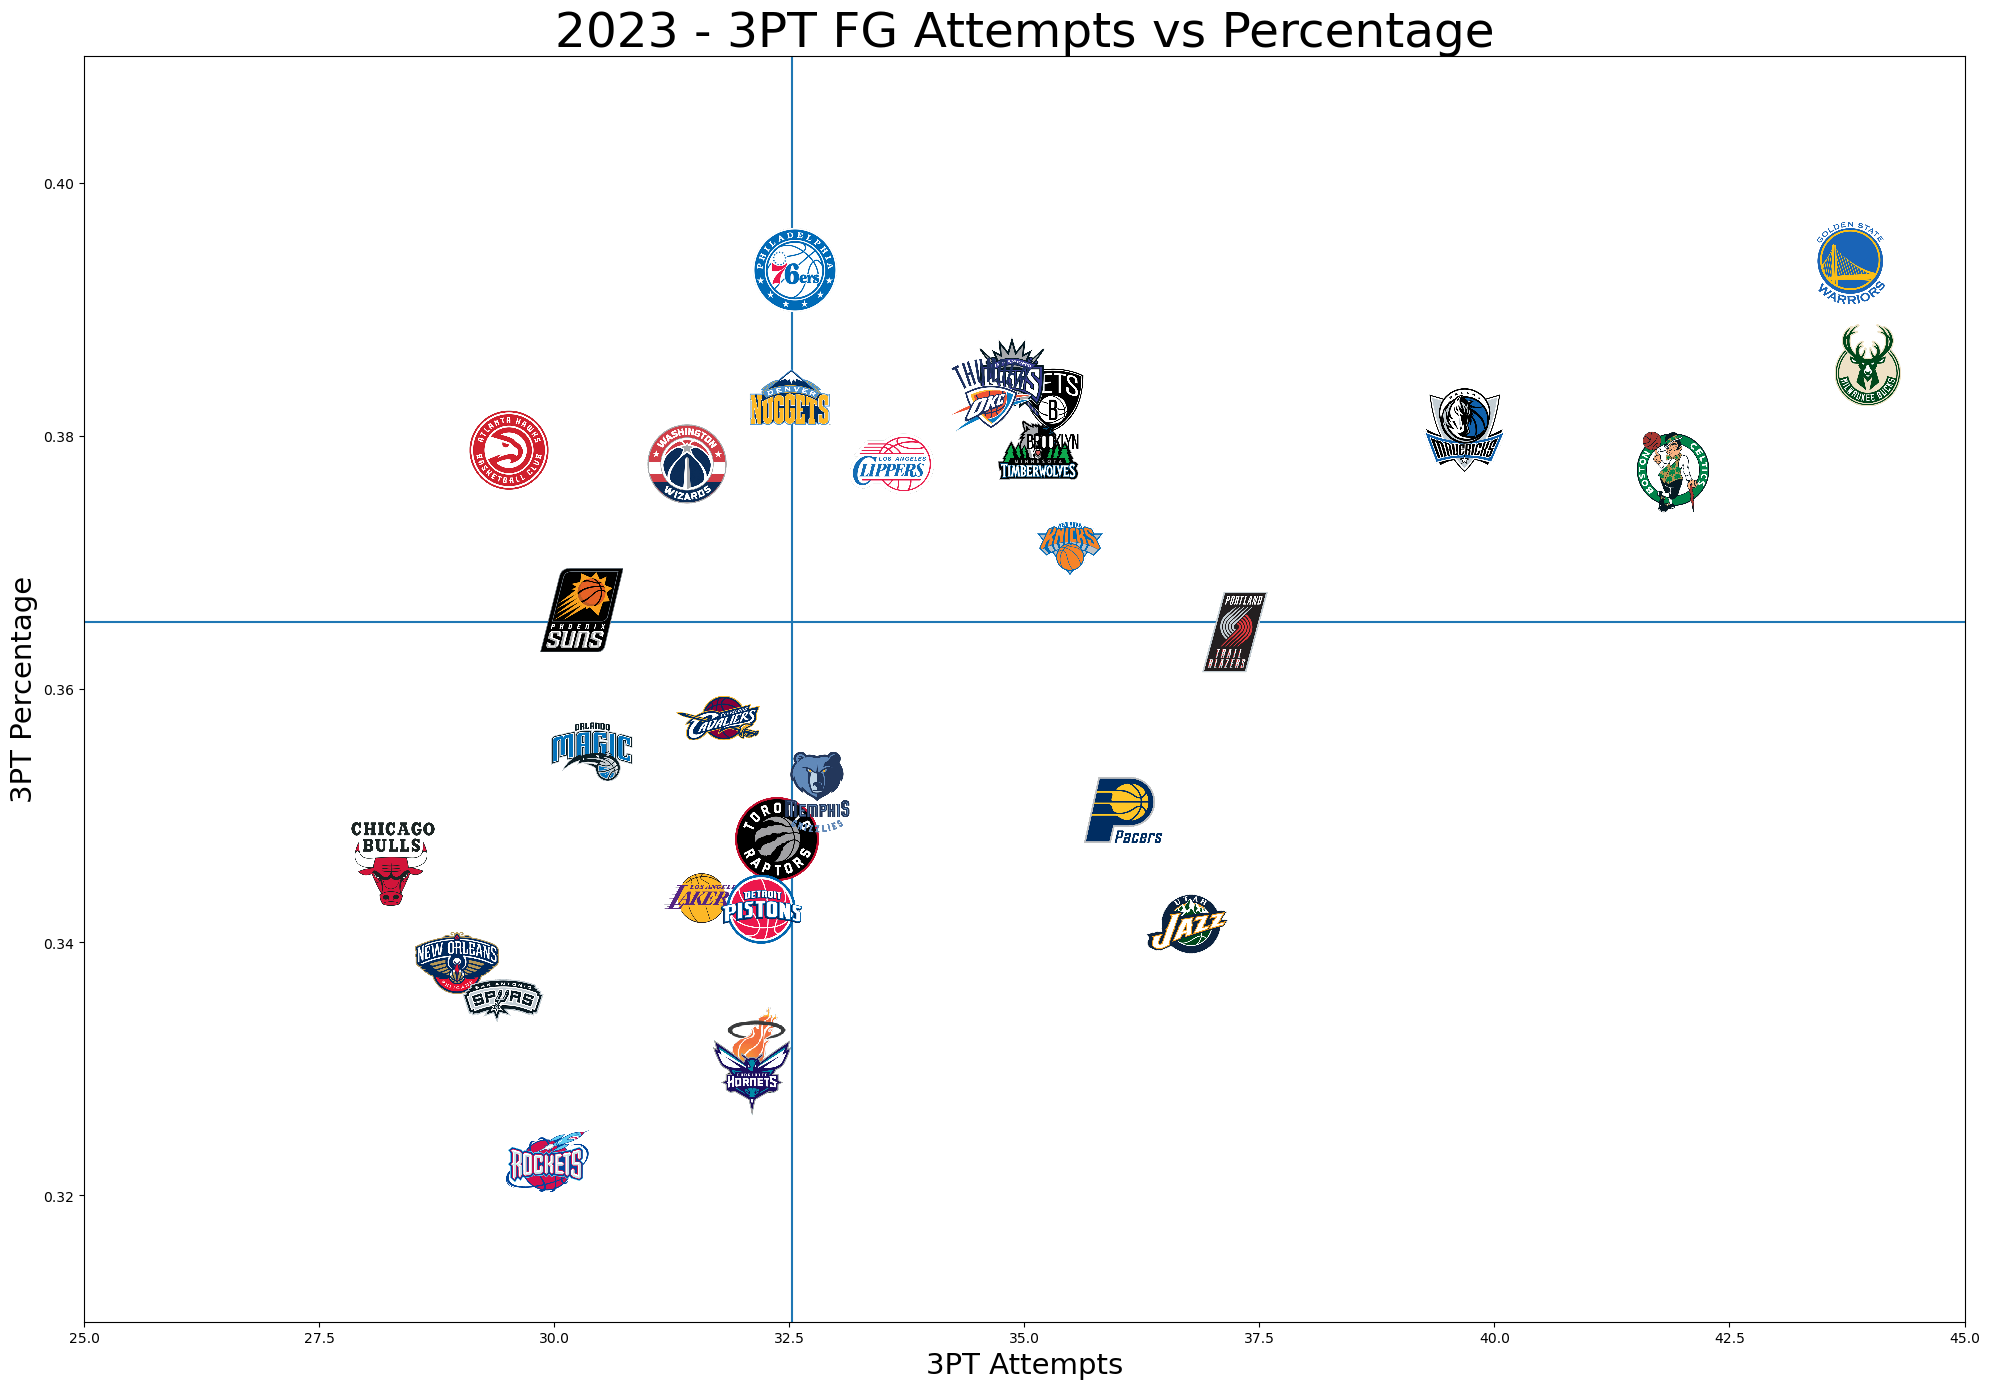

In [341]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the x and y variables
x = data['FG3A']
y = data['FG3_PCT']

# Define the image paths
paths = data['logo_path']

# Define the plot 
fig, ax = plt.subplots()

# Load the data into the plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

# Plot parameters
plt.xlim(25, 45);
plt.ylim(.31, .41);
plt.title("2023 - 3PT FG Attempts vs Percentage", fontdict={'fontsize': 35});
plt.xlabel("3PT Attempts", fontdict={'fontsize' : 21});
plt.ylabel("3PT Percentage", fontdict={'fontsize' : 21});
plt.axhline(FG3_PCT_mean, label = 'Median 3PT PCT')  #horizontal line
plt.axvline(FG3A_mean, label = 'Median 3PT Attempts per Game')  #vertical line
plt.show()

# plt.annotate("Fewest Attempts Per Game", (34, .34))

### Some Code to Change Logo Size

Just needed to alter the size of the Miami Heat logo manually.

In [325]:
for index, path in enumerate(data['logo_path']):
    image = Image.open(path)
    width, height = image.size
    # print(f"{data['abbreviation'][index]}| Width: {width}, Height: {height} ")

In [326]:
from PIL import Image

# open the original image
im = Image.open("logos/MIA.png")

# resize the image
new_width = 800
new_height = 800
im_resized = im.resize((new_width, new_height))

# save the resized image
im_resized.save("logos/MIA.png")